# 环境及数据准备

In [4]:
import pandas as pd
import string

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
from wordcloud import WordCloud

In [7]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [10]:
sms_raw = pd.read_csv("D:/input/sms_spam.csv")
sms_raw.head(10)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [11]:
sms_raw.describe()

,type,text
count,5567,5567
unique,2,5054
top,ham,"Sorry, I'll call later"
freq,4822,30


In [12]:
sms_raw.dtypes

type    object
text    object
dtype: object

In [13]:
# 换了一种方式实现数字编码
sms_raw['type'] = (sms_raw['type'] == 'spam').astype(int)


In [14]:
sms_raw.groupby('type').count()

,text
type,
0,4822
1,745


In [15]:
# 将所有字母转换为小写
def tolower(text):
    return text.lower()
# 去除标点符号和数字
def removePunctuation(text):
    return text.translate({None: string.punctuation+('1234567890')})
# 进行变换
sms_raw['text'] = sms_raw['text'].map(removePunctuation).map(tolower)

In [16]:
count_vect = CountVectorizer(stop_words="english",decode_error='ignore')
sms_counts = count_vect.fit_transform(sms_raw['text'])
sms_counts.shape

(5567, 5388)

In [17]:
tfidf_vect = TfidfVectorizer(stop_words="english",decode_error='ignore',min_df=5)
sms_tfidf = tfidf_vect.fit_transform(sms_raw['text'])
sms_tfidf.shape

(5567, 912)

In [18]:
train_x, test_x, train_y, test_y = train_test_split(sms_tfidf, sms_raw['type'], test_size=0.3)

In [25]:
print(f"训练集垃圾短信和非垃圾短信的占比:\n{train_y.value_counts()/len(train_y)}")

训练集垃圾短信和非垃圾短信的占比:
0    0.864476
1    0.135524
Name: type, dtype: float64


In [26]:
print(f"测试集垃圾短信和非垃圾短信的占比:\n{test_y.value_counts()/len(test_y)}")

测试集垃圾短信和非垃圾短信的占比:
0    0.870138
1    0.129862
Name: type, dtype: float64


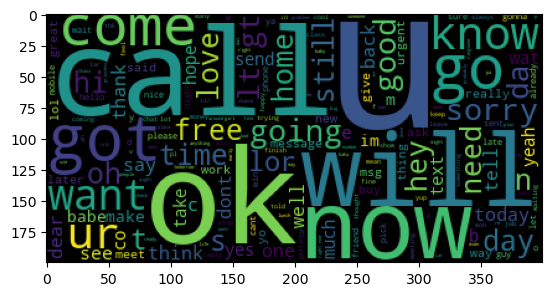

In [28]:
# 查看全部信息的词云
wc = WordCloud()
wc.generate(''.join(sms_raw['text']))
plt.imshow(wc)
plt.show()  

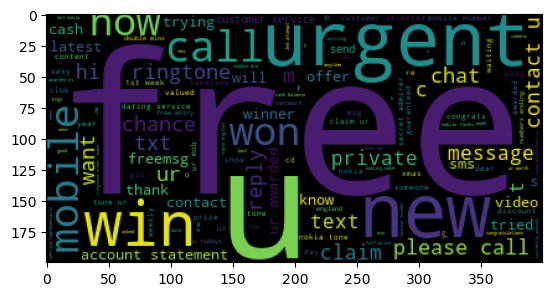

In [29]:
# 查看垃圾短信的词云：
wc.generate(''.join(sms_raw['text'][sms_raw['type']==1]))
plt.imshow(wc)
plt.show()

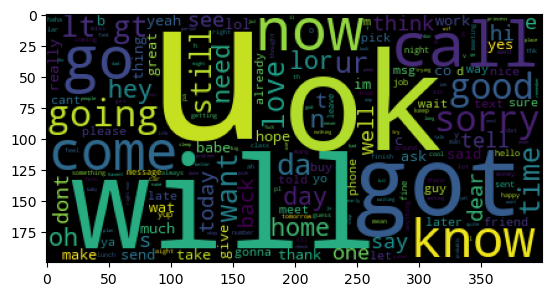

In [30]:
# 查看非垃圾短信的词云
wc.generate(''.join(sms_raw['text'][sms_raw['type']==0]))
plt.imshow(wc)
plt.show()

# 构建和训练模型

In [31]:
sms_classifier = MultinomialNB().fit(train_x,train_y)

# 模型性能评估

In [32]:
# 对测试集的样本进行预测
test_pred = sms_classifier.predict(test_x)
metrics.confusion_matrix(test_y, test_pred)

array([[1440,   14],
       [  64,  153]], dtype=int64)

In [33]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1454
           1       0.92      0.71      0.80       217

    accuracy                           0.95      1671
   macro avg       0.94      0.85      0.89      1671
weighted avg       0.95      0.95      0.95      1671



In [38]:
# 用其他的参数进行模型性能评估

from sklearn import metrics
import matplotlib.pyplot as plt
model=sms_classifier
test_pred_proba = model.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_pred_proba)


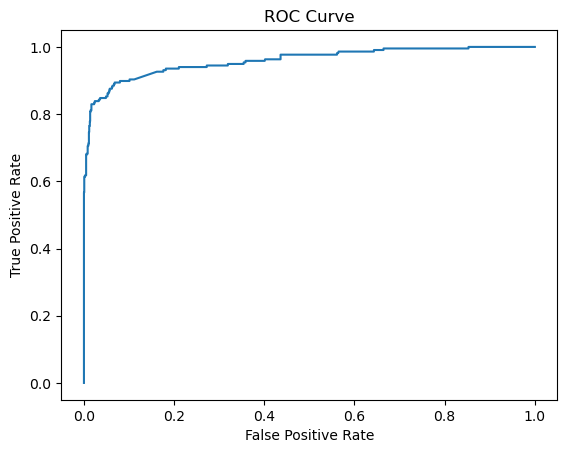

In [39]:
# 绘制 ROC 曲线：
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [40]:
# 计算 AUC 值：
auc = metrics.auc(fpr, tpr)
print('AUC:', auc)


AUC: 0.9590213553584898
